**Transaction-level EDA**

*Objective:* Analyze transactional patterns in online retail dataset to identify cancellation behaviors, revenue distributions, outliers, and data quality issues that will inform customer segmentation and churn prediction strategies.

*EDA to find:*
- What is the dataset structure and data quality?
- How are transactions distributed over time?
- What are the cancellation/return patterns?
- What is the nature of basket sizes and purchase behaviors?
- Are there significant outliers that require special handling?

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df=pd.read_excel('../data/raw/online_retail.xlsx')

1. Data types & nulls 

In [100]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [101]:
df.shape

(541909, 8)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [103]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [104]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [105]:
df=df.dropna(subset=['CustomerID'])
df.shape

(406829, 8)

In [106]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [107]:
df['purchase_qty'] = df['Quantity'].apply(lambda x: x if x > 0 else 0)
df['purchase_amnt']=df['purchase_qty']*df['UnitPrice']
df['cancel_qty']=df['Quantity'].apply(lambda x: abs(x) if x < 0 else 0)
df['cancel_amnt']=df['cancel_qty']*df['UnitPrice']


In [108]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,purchase_qty,purchase_amnt,cancel_qty,cancel_amnt
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,6,15.30,0,0.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,6,20.34,0,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,8,22.00,0,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,6,20.34,0,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,6,20.34,0,0.0
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2,15.30,0,0.0
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,6,25.50,0,0.0
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,6,11.10,0,0.0
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,6,11.10,0,0.0
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,32,54.08,0,0.0


In [109]:
print(df['CustomerID'].nunique())

4372


**1. Observations**

**Actions:**
- Loaded dataset and examined structure (shape, data types, missing values)
- Dropped records with missing `CustomerID`
- Created derived features: `purchase_qty`, `purchase_amnt`, `cancel_qty`, `cancel_amnt`
- Removed 40 records with `UnitPrice = 0` 

**Results:**
- **Original dataset**: 541,909 transactions across 8 features
- **Missing values**: 135,080 missing CustomerIDs (24.9%), 1,454 missing Descriptions (0.27%)
- **After cleaning**: 406,789 transactions from **4,372 unique customers**
- **Data quality issue**: Negative prices observed (min: -£11,062)

**Key Insights:**
- 4,372 unique customers
- 25% data loss due to missing CustomerIDs
- Separated purchases from cancellations 

2. Date range & transaction distribution wrt months

In [110]:
min_date=df['InvoiceDate'].min()
max_date=df['InvoiceDate'].max()
print(f"Date ranges from {min_date} to {max_date}")

Date ranges from 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [111]:
print((df['UnitPrice']==0).sum())
print((df['UnitPrice']<0).sum())
df = df[df['UnitPrice'] != 0]

40
0


In [112]:
print(df.shape)

(406789, 12)


In [113]:
df['date_months']=df['InvoiceDate'].dt.to_period('M')
monthly_transactions=df.groupby('date_months').size()

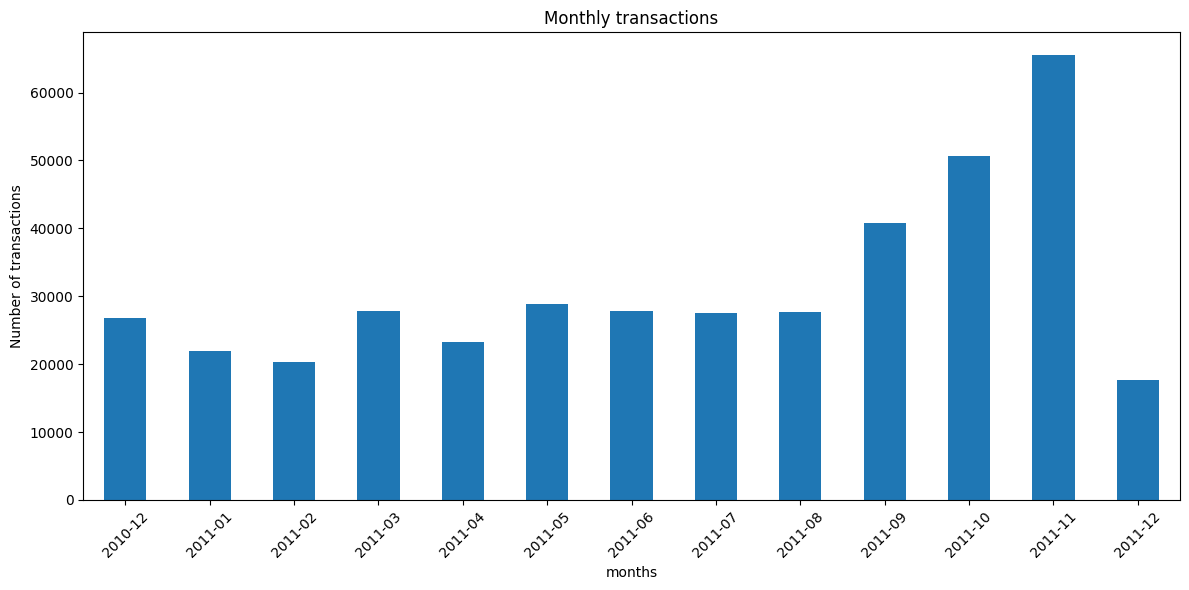

In [114]:
plt.figure(figsize=(12,6))
monthly_transactions.plot(kind='bar')
plt.title('Monthly transactions')
plt.xlabel('months')
plt.ylabel('Number of transactions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**2. Observations**

**Actions:**
- Identified time range of dataset
- Removed records with <= zero unit price
- Aggregated transactions by month and visualized temporal patterns

**Results:**
- **Time range**: December 1, 2010 to December 9, 2011 (373 days)
- **Zero price records**: 40 records removed
- **Final dataset**: 406,789 transactions
- **Monthly patterns**: Visible seasonality and trends in transaction volume

**Key Insights:**
- Dataset covers 1 full year of data
- Partial data for December 2010 and December 2011 
- Monthly transaction visualization shows seasonal patterns

3. Distribution of purchase_quantity, return_quantity, purchase_amount, return_amount & UnitPrice 

In [115]:
min_price=df['UnitPrice'].min()
max_price=df['UnitPrice'].max()
print(f"Price ranges from {min_price} to {max_price}")

Price ranges from 0.001 to 38970.0


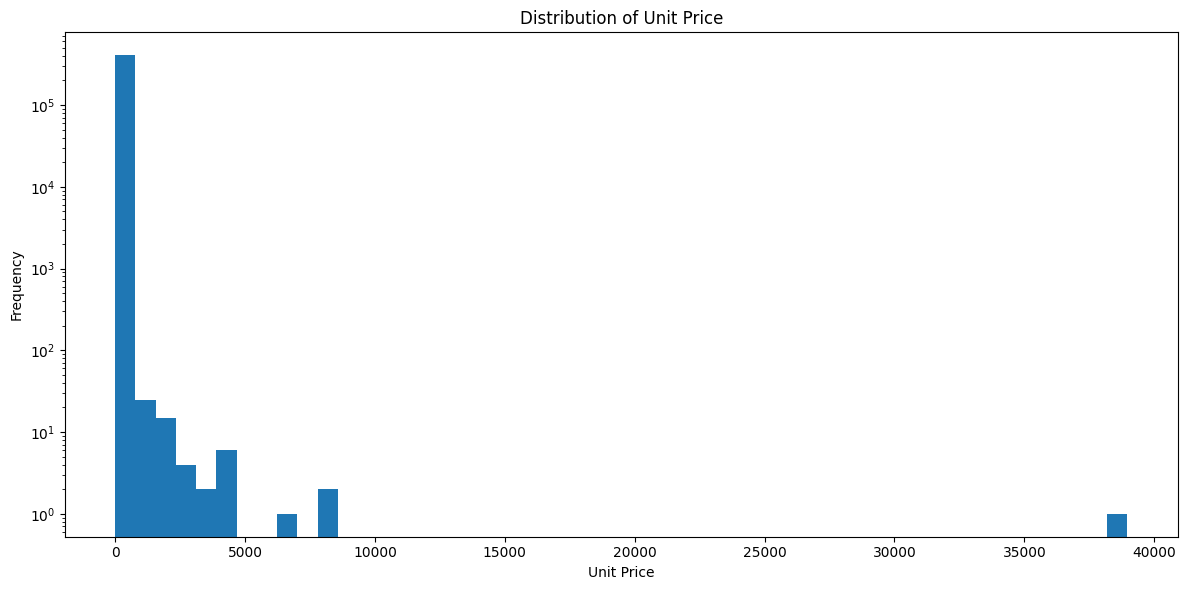

In [116]:
plt.figure(figsize=(12,6))
plt.hist(df['UnitPrice'], bins=50,log=True)
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [117]:
min_purchase_quantity=df['purchase_qty'].min()
max_purchase_quantity=df['purchase_qty'].max()
print(f"Purchase quantity ranges from {min_purchase_quantity} to {max_purchase_quantity}")

min_cancel_quantity=df['cancel_qty'].min()
max_cancel_quantity=df['cancel_qty'].max()
print(f"Cancel quantity ranges from {min_cancel_quantity} to {max_cancel_quantity}")

Purchase quantity ranges from 0 to 80995
Cancel quantity ranges from 0 to 80995


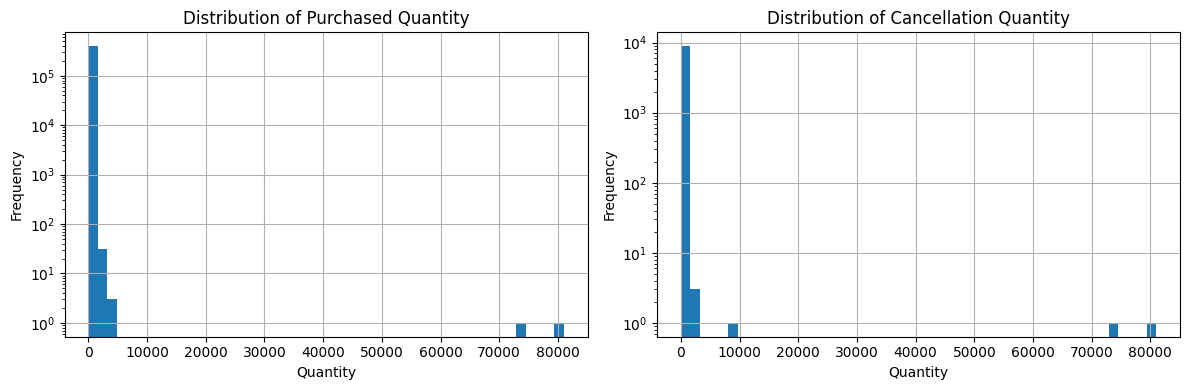

In [118]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Distribution of Purchased Quantity
df[df['purchase_qty'] > 0]['purchase_qty'].hist(bins=50, ax=axes[0],log=True)
axes[0].set_title('Distribution of Purchased Quantity')
axes[0].set_xlabel('Quantity')
axes[0].set_ylabel('Frequency')

# Distribution of Returned Quantity
df[df['cancel_qty'] > 0]['cancel_qty'].hist(bins=50, ax=axes[1],log=True)
axes[1].set_title('Distribution of Cancellation Quantity')
axes[1].set_xlabel('Quantity')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [119]:
min_purchase_amnt=df['purchase_amnt'].min()
max_purchase_amnt=df['purchase_amnt'].max()
print(f"Purchase amnt ranges from {min_purchase_amnt} to {max_purchase_amnt}")

min_cancel_amnt=df['cancel_amnt'].min()
max_cancel_amnt=df['cancel_amnt'].max()
print(f"Return amnt ranges from {min_cancel_amnt} to {max_cancel_amnt}")

Purchase amnt ranges from 0.0 to 168469.6
Return amnt ranges from 0.0 to 168469.6


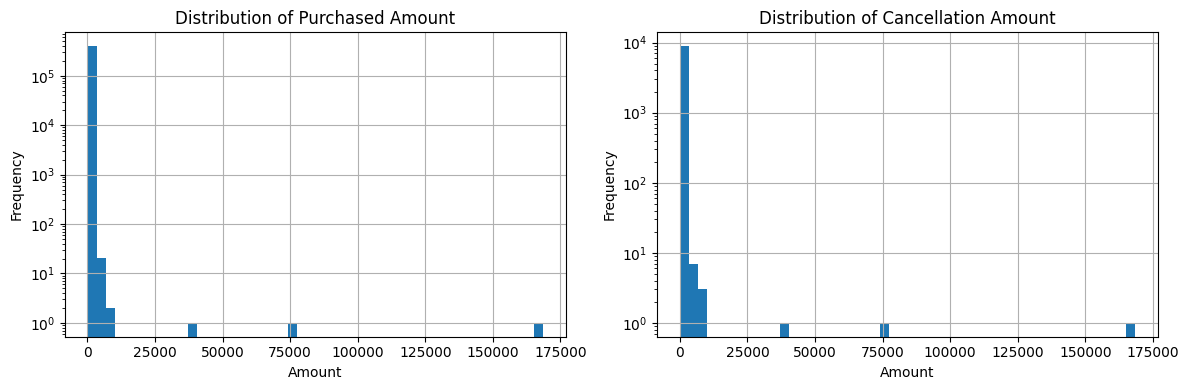

In [120]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Distribution of Purchased Quantity
df[df['purchase_amnt'] > 0]['purchase_amnt'].hist(bins=50, ax=axes[0],log=True)
axes[0].set_title('Distribution of Purchased Amount')
axes[0].set_xlabel('Amount')
axes[0].set_ylabel('Frequency')

# Distribution of Returned Quantity
df[df['cancel_amnt'] > 0]['cancel_amnt'].hist(bins=50, ax=axes[1],log=True)
axes[1].set_title('Distribution of Cancellation Amount')
axes[1].set_xlabel('Amount')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

**3. Observations:**

**Actions:**
- Analyzed distribution of unit prices, purchase quantities, and cancellation quantities
- Analyzed distribution of purchase amounts and cancellation amounts
- Identified range and statistical properties of each metric

**Results:**

**Unit Price:**
- Range: £0.001 to £38,970 (extreme outlier)
- Median: £2.08, Mean: £4.61
- Distribution: Heavily right-skewed (log-scaled for visualization)

**Quantity:**
- Purchase quantity: 0 to 80,995 units (extreme outlier)
- Cancellation quantity: 0 to 80,995 units
- Both distributions are heavily right-skewed

**Revenue:**
- Purchase amount: £0 to £168,469.60
- Cancellation amount: £0 to £168,469.60
- Highly skewed with extreme outliers

**Key Insights:**
- **Extreme outliers present** across all metrics 
- **Log-normal distributions** - requires log transformation or robust scaling for ML models
- **B2B + B2C mix**: Extreme values suggest bulk orders alongside retail transactions

4. Proportion of returns and purchases in the dataset 

In [121]:
tot_purchases=df['purchase_qty'].sum()
tot_cancels=df['cancel_qty'].sum()

per_cancel=tot_cancels/(tot_purchases+tot_cancels)*100
per_purchase=tot_purchases/(tot_purchases+tot_cancels)*100

print(f"Percentage of returns: {per_cancel:.2f}%")
print(f"Percentage of purchases: {per_purchase:.2f}%")

tot_purchases_amnt=df['purchase_amnt'].sum()
tot_cancels_amnt=df['cancel_amnt'].sum()

per_cancel_amnt=tot_cancels_amnt/(tot_purchases_amnt+tot_cancels_amnt)*100
per_purchase_amnt=tot_purchases_amnt/(tot_purchases_amnt+tot_cancels_amnt)*100

tot_amnt=tot_purchases_amnt+tot_cancels_amnt

print(f"\nPercentage of returns amnt: {per_cancel_amnt:.2f}%")
print(f"Percentage of purchases amnt: {per_purchase_amnt:.2f}%")
print(f"\nReturn ratio(wrt quantity): {tot_cancels/tot_purchases:.2f}")
print(f"Return ratio(wrt amount): {tot_cancels_amnt/tot_purchases_amnt:.2f}")

Percentage of returns: 5.05%
Percentage of purchases: 94.95%

Percentage of returns amnt: 6.42%
Percentage of purchases amnt: 93.58%

Return ratio(wrt quantity): 0.05
Return ratio(wrt amount): 0.07


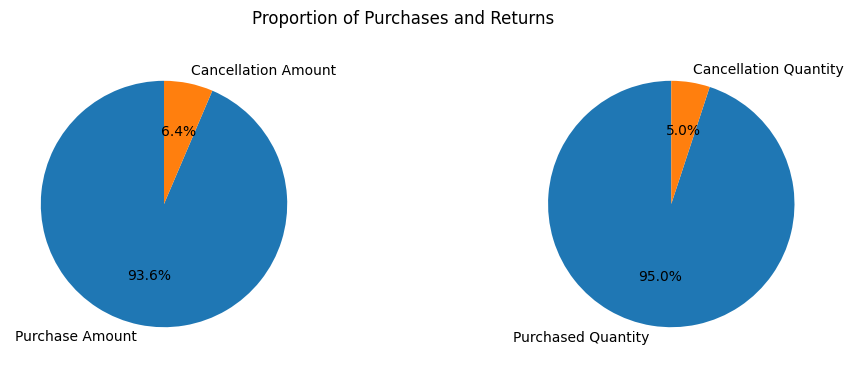

In [122]:
fig,axes=plt.subplots(1,2,figsize=(12,4))

labels_amnt=['Purchase Amount','Cancellation Amount']
values_amnt=[tot_purchases_amnt,tot_cancels_amnt]

labels_qty=['Purchased Quantity','Cancellation Quantity']
values_qty=[tot_purchases,tot_cancels]

axes[0].pie(values_amnt, labels=labels_amnt, autopct='%1.1f%%', startangle=90)
axes[1].pie(values_qty, labels=labels_qty, autopct='%1.1f%%', startangle=90)
plt.suptitle('Proportion of Purchases and Returns')
plt.show()

**4. Observations:**

**Actions:**
- Calculated total purchases vs cancellations (by quantity and revenue)
- Computed cancellation rates and return ratios
- Visualized proportions using pie charts

**Results:**
- **Cancellation rate (quantity)**: 5.05%
- **Cancellation rate (revenue)**: 6.42%
- **Purchase rate**: 94.95% (quantity), 93.58% (revenue)
- **Return ratio**: 0.05 (quantity), 0.07 (revenue)

**Key Insights:**
- **Low cancellation rate** overall (5-6%) 
- **Higher revenue cancellation** (6.42%) vs quantity cancellation (5.05%)
  - Indicates: **Higher-priced items are more likely to be returned**
  - Customers more selective about expensive purchases
- Return ratio of 0.07: **For every £100 purchased, £7 is cancelled/returned**
- **For churn modeling**: Cancellation rate is a strong predictor - customers with high cancellation rates may be at risk

5. Invoice structure (items per invoice)

In [123]:
#items per invoice
purchased_items_per_invoice=df.groupby('InvoiceNo')['purchase_qty'].sum()
print(f"Items purchased per invoice(basket size): {purchased_items_per_invoice.describe()}")

cancelled_items_per_invoice=df.groupby('InvoiceNo')['cancel_qty'].sum()
print(f"\nItems cancelled per invoice(basket size): {cancelled_items_per_invoice.describe()}")

Items purchased per invoice(basket size): count    22186.000000
mean       232.931218
std        895.007534
min          0.000000
25%         30.000000
50%        120.000000
75%        254.000000
max      80995.000000
Name: purchase_qty, dtype: float64

Items cancelled per invoice(basket size): count    22186.000000
mean        12.386550
std        745.628192
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      80995.000000
Name: cancel_qty, dtype: float64


In [124]:
#unique items per invoice
unique_items=df.groupby('InvoiceNo')['StockCode'].nunique()
print(f"Unique items per invoice: {unique_items.describe()}")

Unique items per invoice: count    22186.000000
mean        17.878257
std         22.873284
min          1.000000
25%          3.000000
50%         12.000000
75%         24.000000
max        541.000000
Name: StockCode, dtype: float64


In [125]:
#amnt relation with invoice
purchased_amnt_per_invoice=df.groupby('InvoiceNo')['purchase_amnt'].sum()
cancelled_amnt_per_invoice=df.groupby('InvoiceNo')['cancel_amnt'].sum()

print(f"Purchased amount per invoice: {purchased_amnt_per_invoice.describe()}")
print(f"\nCancelled amount per invoice: {cancelled_amnt_per_invoice.describe()}")

Purchased amount per invoice: count     22186.000000
mean        401.668075
std        1544.113100
min           0.000000
25%          88.200000
50%         241.675000
75%         418.052500
max      168469.600000
Name: purchase_amnt, dtype: float64

Cancelled amount per invoice: count     22186.000000
mean         27.555309
std        1291.727534
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      168469.600000
Name: cancel_amnt, dtype: float64


In [126]:
#cancel invoice counts
cancel_invoice=df['InvoiceNo'].astype(str).str.startswith('C').sum()
print(f"Number of cancel invoices: {cancel_invoice}")

Number of cancel invoices: 8905


**5. Observations:**

**Actions:**
- Analyzed items per invoice (basket size) for purchases and cancellations
- Examined unique products per invoice (basket diversity)
- Calculated revenue statistics per invoice
- Counted invoices with cancellation prefix 'C'

**Results:**

**Basket Size (Items per Invoice):**
- **Purchase baskets**: Mean = 232.93, Median = 120, Max = 80,995
- **Cancellation baskets**: Mean = 12.39, Median = 0 (75th percentile = 0)
- High standard deviation = extreme variability

**Basket Diversity (Unique Products):**
- Mean: 17.88 unique items per invoice
- Median: 12 unique items
- Max: 541 unique items
- Suggests customers buy multiple quantities of same items

**Revenue per Invoice:**
- **Purchase amount**: Mean = £401.67, Median = £241.68, Max = £168,469.60
- **Cancellation amount**: Mean = £27.56, Median = £0 (75% have no cancellations)

**Invoice Types:**
- **Total invoices**: 22,186
- **Cancellation invoices** (prefix 'C'): 8,905 (40.14%)
- **Regular invoices**: 13,281 (59.86%)

**Key Insights:**
- **Median basket**: 120 items with 12 unique products shows **Repeat purchases within same order**
- **75% of invoices have ZERO cancellations** shows cancellation behavior concentrated in 25% of transactions
- **40% cancellation invoices, but only 5-6% actual cancellations** shows many small cancellation invoices
- **Mean >> Median** for all metrics shows heavy right skew with high-value outliers
- **B2B pattern**: Large basket sizes (80,995 max) indicate wholesale customers
- **For clustering**: Basket size and cancellation behavior are strong differentiators
- **Feature engineering**:
  - Avg basket size per customer
  - Basket diversity score
  - Cancellation frequency
  - Invoice-level behaviors aggregate to customer profiles


## Summary of Transaction-Level EDA

### Dataset Overview
- **Final clean dataset**: 406,789 transactions
- **Customers**: 4,372 unique customers
- **Invoices**: 22,186 unique invoices
- **Time period**: December 2010 - December 2011 (~12 months)
- **Data removed**: 135,080 records (missing CustomerID), 40 records (zero price)

### Key Findings

**1. Cancellation Behavior**
- Overall cancellation rate: 5.05% (quantity), 6.42% (revenue)
- 40% of invoices are cancellation invoices, but represent only 5-6% of volume
- 75% of invoices have zero cancellations
- Higher-priced items more likely to be returned

**2. Distribution Characteristics**
- All metrics (quantity, price, revenue) are **heavily right-skewed**
- Extreme outliers: quantity (80,995), price (£38,970), invoice (£168,469)

**3. Basket Behavior**
- Median basket: 120 items, 12 unique products
- Suggests repeat purchases of same items within orders
- B2B/wholesale customers present (extreme basket sizes)

**4. Business Patterns**
- Mix of B2B (bulk) and B2C (retail) transactions
- Revenue concentration with high-value outliers
- Presence of "whale customers" driving significant revenue

### Data Quality Issues to Address
1. Negative unit prices (-£11,062 min) handed(dropped)
2. Missing CustomerIDs handled (dropped)
3. Zero prices handled (dropped)
4. Extreme outliers require robust scaling/capping

**EDA Complete**